In [4]:
#basic library
import pandas as pd
import numpy as np



#pre-processing library 
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
import stanza


#plotting
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
HindiStopWords = ["मैं","मुझको","मेरा","अपने आप को","हमने","हमारा","अपना","हम","आप","आपका","तुम्हारा","अपने आप","स्वयं","वह","इसे","उसके","खुद को","कि वह","उसकी","उसका","खुद ही","यह","इसके","उन्होने","अपने","क्या","जो","किसे","किसको","कि","ये","हूँ","होता है","रहे","थी","थे","होना","गया","किया जा रहा है","किया है","है","पडा","होने","करना","करता है","किया","रही","एक","लेकिन","अगर","या","क्यूंकि","जैसा","जब तक","जबकि","की","पर","द्वारा","के लिए","साथ","के बारे में","खिलाफ","बीच","में","के माध्यम से","दौरान","से पहले","के बाद","ऊपर","नीचे","को","से","तक","से नीचे","करने में","निकल","बंद","से अधिक","तहत","दुबारा","आगे","फिर","एक बार","यहाँ","वहाँ","कब","कहाँ","क्यों","कैसे","सारे","किसी","दोनो","प्रत्येक","ज्यादा","अधिकांश","अन्य","में कुछ","ऐसा","में कोई","मात्र","खुद","समान","इसलिए","बहुत","सकता","जायेंगे","जरा","चाहिए","अभी","और","कर दिया","रखें","का","हैं","इस","होता","करने","ने","बनी","तो","ही","हो","इसका","था","हुआ","वाले","बाद","लिए","सकते","इसमें","दो","वे","करते","कहा","वर्ग","कई","करें","होती","अपनी","उनके","यदि","हुई","जा","कहते","जब","होते","कोई","हुए","व","जैसे","सभी","करता","उनकी","तरह","उस","आदि","इसकी","उनका","इसी","पे","तथा","भी","परंतु","इन","कम","दूर","पूरे","गये","तुम","मै","यहां","हुये","कभी","अथवा","गयी","प्रति","जाता","इन्हें","गई","अब","जिसमें","लिया","बड़ा","जाती","तब","उसे","जाते","लेकर","बड़े","दूसरे","जाने","बाहर","स्थान","उन्हें ","गए","ऐसे","जिससे","समय","दोनों","किए","रहती","इनके","इनका","इनकी","सकती","आज","कल","जिन्हें","जिन्हों","तिन्हें","तिन्हों","किन्हों","किन्हें","इत्यादि","इन्हों","उन्हों","बिलकुल","निहायत","इन्हीं","उन्हीं","जितना","दूसरा","कितना","साबुत","वग़ैरह","कौनसा","लिये","दिया","जिसे","तिसे","काफ़ी","पहले","बाला","मानो","अंदर","भीतर","पूरा","सारा","उनको","वहीं","जहाँ","जीधर","﻿के","एवं","कुछ","कुल","रहा","जिस","जिन","तिस","तिन","कौन","किस","संग","यही","बही","उसी","मगर","कर","मे","एस","उन","सो","अत","",]

In [3]:
BengaliStopWords = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]

In [4]:
TamilStopWords = ['அங்கு', 'அங்கே', 'அடுத்த', 'அதனால்', 'அதன்', 'அதற்கு', 'அதிக', 'அதில்', 'அது', 'அதே', 'அதை', 'அந்த', 'அந்தக்', 'அந்தப்', 'அன்று', 'அல்லது', 'அவன்', 'அவரது', 'அவர்', 'அவர்கள்', 'அவள்', 'அவை', 'ஆகிய', 'ஆகியோர்', 'ஆகும்', 'இங்கு', 'இங்கே', 'இடத்தில்', 'இடம்', 'இதனால்', 'இதனை', 'இதன்', 'இதற்கு', 'இதில்', 'இது', 'இதை', 'இந்த', 'இந்தக்', 'இந்தத்', 'இந்தப்', 'இன்னும்', 'இப்போது', 'இரு', 'இருக்கும்', 'இருந்த', 'இருந்தது', 'இருந்து', 'இவர்', 'இவை', 'உன்', 'உள்ள', 'உள்ளது', 'உள்ளன', 'எந்த', 'என', 'எனக்', 'எனக்கு', 'எனப்படும்', 'எனவும்', 'எனவே', 'எனினும்', 'எனும்', 'என்', 'என்ன', 'என்னும்', 'என்பது', 'என்பதை', 'என்ற', 'என்று', 'என்றும்', 'எல்லாம்', 'ஏன்', 'ஒரு', 'ஒரே', 'ஓர்', 'கொண்ட', 'கொண்டு', 'கொள்ள', 'சற்று', 'சிறு', 'சில', 'சேர்ந்த', 'தனது', 'தன்', 'தவிர', 'தான்', 'நான்', 'நாம்', 'நீ', 'பற்றி', 'பற்றிய', 'பல', 'பலரும்', 'பல்வேறு', 'பின்', 'பின்னர்', 'பிற', 'பிறகு', 'பெரும்', 'பேர்', 'போது', 'போன்ற', 'போல', 'போல்', 'மட்டுமே', 'மட்டும்', 'மற்ற', 'மற்றும்', 'மிக', 'மிகவும்', 'மீது', 'முதல்', 'முறை', 'மேலும்', 'மேல்', 'யார்', 'வந்த', 'வந்து', 'வரும்', 'வரை', 'வரையில்', 'விட', 'விட்டு', 'வேண்டும்', 'வேறு']

In [5]:
dh=pd.read_csv("./hindi-csv.csv")

In [6]:
db=pd.read_csv("./bengali-csv.csv")

In [7]:
dt=pd.read_csv("./tamil-csv.csv")


In [8]:
dt.head()

,text,flag,processed
0,கூடுதல் சுயசரிதை ஆசிரியர் நல்ல வரவேற்பைப் பெற்...,0,addit biographi author well receiv சுயசரிதை போ...
1,ஃபக் டிக்ஸ்டர்நெட் டிக்ஹெட்,1,ஃபக் டிக்ஸ்டர்நெட் டிக்ஹெட்
2,::: jÂ =Â log10(b) எனில் bÂ =&nbsp10j.; ::::1Â...,0,j log10(b) b &nbsp10j 1 ha &nbsp104 mÂ² எனவே ஹ...
3,கேஸ் ரிப்போர்ட் படித்தது பரிதாபம் கொத்து சோம்ப...,1,வழக்கு அறிக்கை வாசிக்கப்பட்டது aw bunch lazi i...
4,==சிறந்த வேலை== *நர்சிங் நெறிமுறைகள் பற்றிய அ...,0,பெரிய வேலை *அதிசய வேலை நர்ஸ் நெறிமுறை


In [9]:
df = [dh,db,dt]
c=0
for i in df:
    i["label"] = [c for j in range(len(i))]
    c=c+1

In [10]:
dt

,text,flag,processed,label
0,கூடுதல் சுயசரிதை ஆசிரியர் நல்ல வரவேற்பைப் பெற்...,0,addit biographi author well receiv சுயசரிதை போ...,2
1,ஃபக் டிக்ஸ்டர்நெட் டிக்ஹெட்,1,ஃபக் டிக்ஸ்டர்நெட் டிக்ஹெட்,2
2,::: jÂ =Â log10(b) எனில் bÂ =&nbsp10j.; ::::1Â...,0,j log10(b) b &nbsp10j 1 ha &nbsp104 mÂ² எனவே ஹ...,2
3,கேஸ் ரிப்போர்ட் படித்தது பரிதாபம் கொத்து சோம்ப...,1,வழக்கு அறிக்கை வாசிக்கப்பட்டது aw bunch lazi i...,2
4,==சிறந்த வேலை== *நர்சிங் நெறிமுறைகள் பற்றிய அ...,0,பெரிய வேலை *அதிசய வேலை நர்ஸ் நெறிமுறை,2
...,...,...,...,...
29994,"omfg, நான் மிகவும் சோர்வாக இருக்கிறேன், நான் ...",1,omfg im friggin bore cant just someth,2
29995,ஆம் அறியாமை பேரின்பம்,0,ஆம் பேரின்பத்தை புறக்கணிக்கவும்,2
29996,"RT @KBrnnr நான் செக்சிஸ்ட் இல்லை, ஆனால் அந்த ப...",1,rt im sexist femal ref made aw aw call மேஜிக் ...,2
29997,` == கிகே == அடடா பாப்பா! அதை விட்டு விடு! நீங...,0,கிகே டம்மிட் பாபா லீவ் அலோன் லெட் நோ டச் டச் )...,2


### Hindi stemmer

In [29]:
def hindiStemmer(word):
    
    suffixes = {
        1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
        2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
        3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
        4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
        5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
    } 
    
    for L in range(1,5): 
        if len(word) >= L + 1:
            for suffix in suffixes[L]:
                if word.endswith(suffix):
                    word=word[:-L] #stripping the suffix from the word
        
    return word

### Bengali stemming

In [30]:
def _stem_verb_step_1(word):
    if word.endswith(('ই', 'ছ', 'ত', 'ব', 'ল', 'ন', 'ক', 'স', 'ম')):
        return word[:-1]
    return word


def _stem_verb_step_2(word):
    if word.endswith(('লা', 'তা', 'ছি', 'বে', 'তে', 'ছে', 'লে')):
        return word[:-2]
    return word


def _stem_verb_step_3(word):
    if word.endswith(('ছি', 'ছে')):
        return word[:-2]
    return word


def _harmonize_verb(word):
    if word.endswith('য়ে'):
        return word[:-3] + 'ে'
    if word.endswith('ই'):
        return word[:-2] + 'া'
    return word


def _stem_verb_step_4(word):
    if len(word) > 1 and not word.endswith(('ই', 'য়ে', 'ও')):
        if word.endswith(('া', 'ে', 'ি')):
            return word[:-1]
        return word
    else:
        return _harmonize_verb(word)


def bengaliStem(word):
    stemmed = _stem_verb_step_1(word)
    stemmed = _stem_verb_step_2(stemmed)
    stemmed = _stem_verb_step_3(stemmed)
    stemmed = _stem_verb_step_4(stemmed)
    return stemmed

## Text Processing

In [82]:
def textCleaning(text,label):
    text = str(text)
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    html_pattern = re.compile('<.*?>')
    text =  html_pattern.sub(r'', text)
    text = re.sub(r'[\.;:\`\~=\[\]\_\-,\?\"\'\/!]','',text)
    
    text = ' '.join(re.sub("/\r?\[a-z]/"," ", text).split())
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", text).split())
    token = text.split(" ")
    if label == 0:
        token = [i for i in token if i not in HindiStopWords] 
        token = [hindiStemmer(i) for i in token]
        
    elif label == 1:
        token = [i for i in token if i not in BengaliStopWords]
        token = [bengaliStem(i) for i in token]
    
    elif label == 2:
        token = [i for i in token if i not in TamilStopWords]
        nlp = stanza.Pipeline(lang='ta', processors='tokenize,mwt,pos,lemma')
        doc = nlp(" ".join(token))
        token = [word.lemma for sent in doc.sentences for word in  sent.words]
    
    
    
    return " ".join(token)

In [14]:
df=pd.concat([dh,dt,db])
df["processed"] = df(processor(df.text, df.label))#this one

In [39]:
df.rename(columns={"processed":"cleanText"}, inplace=True)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU
from sklearn.metrics import confusion_matrix, accuracy_score


In [11]:
df=pd.concat([dh,db,dt])
df= df.dropna()#drop null values
df = df.drop_duplicates()

In [12]:
df

,text,flag,processed
0,पुन: ब्लॉक किया गया खाता संपादित करना व्यापक स...,0,रीब्लॉक अकाउंट को फिर से ब्लॉक करें संपादित कर...
1,"हवाई किराया कम क्यों नहीं हो सकता? या, मुझे ट...",1,मैं एयरफार नहीं जा सकता या मैं टेक्सास नहीं रह...
2,यह धागा: https://t.co/ZydzsHC4Ql - यह जोड़ नही...,0,यह धागा नहीं जोड़ता है क्या मुझे कुछ याद आ रहा है
3,बिस्तर पर जा रहा हूँ ... अभी भी यकीन नहीं है ...,1,हेड बेडस्टिल श्योर ट्विटर वर्क नून समझाएं
4,== कार मलबे की घटनाएं == इस पॉलिन लेख के संदर्...,0,कार व्रेक घटनाएं एनी उपयोग विस्तार से सार्वजनि...
...,...,...,...
29994,"omfg, நான் மிகவும் சோர்வாக இருக்கிறேன், நான் ...",1,omfg im friggin bore cant just someth
29995,ஆம் அறியாமை பேரின்பம்,0,ஆம் பேரின்பத்தை புறக்கணிக்கவும்
29996,"RT @KBrnnr நான் செக்சிஸ்ட் இல்லை, ஆனால் அந்த ப...",1,rt im sexist femal ref made aw aw call மேஜிக் ...
29997,` == கிகே == அடடா பாப்பா! அதை விட்டு விடு! நீங...,0,கிகே டம்மிட் பாபா லீவ் அலோன் லெட் நோ டச் டச் )...


In [15]:
X= df.drop(["flag", "text"],axis=1)
X.processed = X.processed.astype("str")
y=df['flag']

In [16]:
text=X.copy()

In [18]:
BoW = list(text["processed"])

In [19]:
BoW

['रीब्लॉक अकाउंट को फिर से ब्लॉक करें संपादित करें स्पैम अभियान व्यक्ति पर हमला सीरियल धारणा बुरा विश्वास माफ कर दिया जारी प्रकाश रीसेट के बावजूद ब्लॉक सामान्य वेणु के माध्यम से अनब्लॉक करने का अनुरोध कर सकता है',
 'मैं एयरफार नहीं जा सकता या मैं टेक्सास नहीं रह सकता, मैं नहीं जानता कि मैं आयोवा बनाऊंगा',
 'यह धागा नहीं जोड़ता है क्या मुझे कुछ याद आ रहा है',
 'हेड बेडस्टिल श्योर ट्विटर वर्क नून समझाएं',
 'कार व्रेक घटनाएं एनी उपयोग विस्तार से सार्वजनिक आकर्षण पर चर्चा करें सारा पॉलिन बनाम vi कार मलबे घटनाएं संदर्भ पॉलिन लेख विषय उपयुक्त एक सहायक पॉलिन लेख',
 'आप गाने को हटाते हैं, मुझे नहीं लगता कि कुछ भी गलत है बिट टोरेंट लिंक sinc कभी भी व्यावसायिक रूप से जारी नहीं होता है',
 'आह, मैंने लिखा हुआ देखा है जीएनयू कैन टेंप्लेट ऐड पिक्चर टेम्प्लेटजीएफडीएल',
 'क्रिस्टिन तुम्हारा सबसे अच्छा सरल अमेज',
 'और मुसलमान कभी आगे नहीं बढ़ता वे अब भी बर्बर हैं',
 'वास्तव में ऐसा महसूस होता है जैसे डैन नॉर्थ टेक टीडीडी',
 'हाँ जाओ न तो अच्छी उम्मीद है',
 'अनवर समझौता बुश प्रशासन ब्रिटेन के बाहर पोलैं

In [20]:
voc_size=8000
onehot_repr=[one_hot(words,voc_size)for words in BoW] 
onehot_repr

[[5319,
  1810,
  4872,
  5493,
  1096,
  5435,
  1603,
  3713,
  1603,
  2166,
  4012,
  3257,
  6268,
  4436,
  4304,
  3000,
  3412,
  2976,
  581,
  4486,
  3822,
  1219,
  678,
  2439,
  6286,
  6728,
  5435,
  5896,
  1253,
  6286,
  7102,
  1096,
  2323,
  1382,
  4503,
  3853,
  4486,
  3687,
  6793],
 [6606,
  4803,
  3485,
  4037,
  3687,
  1397,
  6606,
  4218,
  3485,
  4670,
  3687,
  6606,
  3485,
  3897,
  397,
  6606,
  1084,
  4034],
 [6984, 5713, 3485, 3334, 6793, 127, 929, 3621, 1961, 3947, 8, 6793],
 [1762, 4179, 2322, 479, 3115, 2321, 994],
 [1738,
  1940,
  762,
  654,
  2518,
  2802,
  1096,
  4147,
  2441,
  6268,
  4166,
  1603,
  7251,
  15,
  3553,
  7361,
  1738,
  2564,
  762,
  7465,
  15,
  1905,
  6627,
  2036,
  6168,
  2349,
  15,
  1905],
 [580,
  143,
  4872,
  1128,
  4836,
  929,
  3485,
  7480,
  397,
  3621,
  3205,
  766,
  6793,
  3680,
  7453,
  2769,
  7429,
  4996,
  3205,
  5090,
  5489,
  1096,
  1219,
  3485,
  6966,
  6793],
 [1510, 2321

In [22]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[4486 3822 1219 ... 4486 3687 6793]
 [   0    0 6606 ... 6606 1084 4034]
 [   0    0    0 ... 3947    8 6793]
 ...
 [   0    0    0 ... 3135 6905 7785]
 [   0    0    0 ... 6334 2605 6102]
 [   0    0    0 ... 3159 4800 1370]]


In [23]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [25]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)
y_pred_np = classifier_np.predict(X_test)

In [14]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)

In [27]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)

In [28]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

In [29]:
rf_score = accuracy_score(y_test, y_pred_rf)
lr_score = accuracy_score(y_test, y_pred_lr)
np_score = accuracy_score(y_test, y_pred_np)
knn_score = accuracy_score(y_test, y_pred_knn)

print('Random Forest Accuracy: ', str(rf_score))
print('Logistic Regression Accuracy: ', str(lr_score))
print('Naive Bayes Accuracy: ', str(np_score))
print('KNN  Accuracy: ', str(knn_score))

Random Forest Accuracy:  0.5926088423894701
Logistic Regression Accuracy:  0.6105973675329058
Naive Bayes Accuracy:  0.6078974012824839
KNN  Accuracy:  0.5818089773877827


### Bi-LSTM Model

In [30]:
embedding_vector_features=70 #size of input
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))#used for input preparation 
model1.add(Bidirectional(LSTM(50)))# Bi -lstm input flows in both direction
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 70)            560000    
                                                                 
 bidirectional (Bidirectiona  (None, 100)              48400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 608,501
Trainable params: 608,501
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
data = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1880/1880 [==============================] - 54s 24ms/step - loss: 0.5641 - accuracy: 0.7009 - val_loss: 0.5385 - val_accuracy: 0.7245
Epoch 2/5
1880/1880 [==============================] - 44s 23ms/step - loss: 0.4889 - accuracy: 0.7594 - val_loss: 0.5464 - val_accuracy: 0.7186
Epoch 3/5
1880/1880 [==============================] - 43s 23ms/step - loss: 0.4296 - accuracy: 0.7955 - val_loss: 0.5888 - val_accuracy: 0.7104
Epoch 4/5
1880/1880 [==============================] - 42s 23ms/step - loss: 0.3677 - accuracy: 0.8299 - val_loss: 0.6286 - val_accuracy: 0.6955
Epoch 5/5
1880/1880 [==============================] - 43s 23ms/step - loss: 0.3015 - accuracy: 0.8636 - val_loss: 0.7258 - val_accuracy: 0.6908


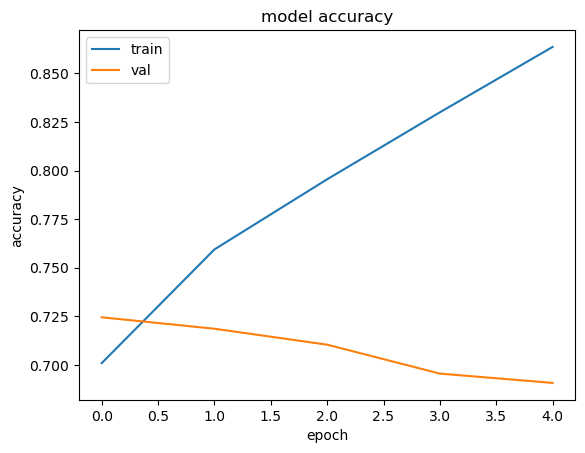

In [32]:
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### GRU Model

In [33]:
embedding_vector_features=70
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(GRU(50))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 70)            560000    
                                                                 
 gru (GRU)                   (None, 50)                18300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 578,351
Trainable params: 578,351
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
data = model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1880/1880 [==============================] - 38s 19ms/step - loss: 0.5649 - accuracy: 0.6998 - val_loss: 0.5430 - val_accuracy: 0.7204
Epoch 2/5
1880/1880 [==============================] - 35s 19ms/step - loss: 0.4835 - accuracy: 0.7642 - val_loss: 0.5488 - val_accuracy: 0.7163
Epoch 3/5
1880/1880 [==============================] - 36s 19ms/step - loss: 0.4263 - accuracy: 0.8007 - val_loss: 0.5915 - val_accuracy: 0.7155
Epoch 4/5
1880/1880 [==============================] - 35s 19ms/step - loss: 0.3697 - accuracy: 0.8311 - val_loss: 0.6415 - val_accuracy: 0.7054
Epoch 5/5
1880/1880 [==============================] - 36s 19ms/step - loss: 0.3099 - accuracy: 0.8625 - val_loss: 0.7411 - val_accuracy: 0.6980


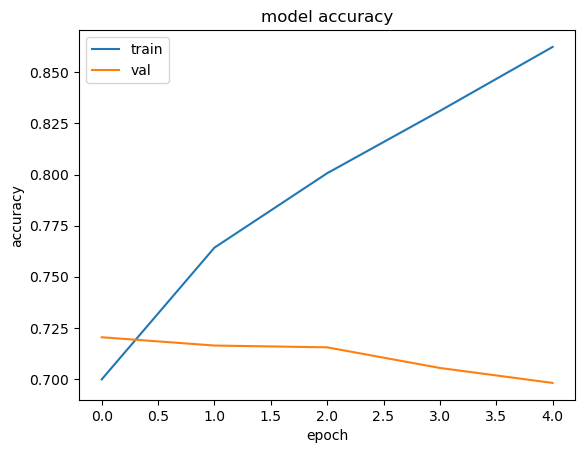

In [35]:
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

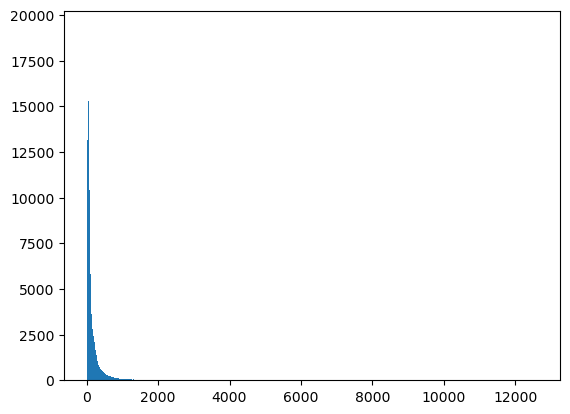

In [37]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in df.processed], bins=500)
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :) 

In [5]:
import tensorflow as tf
model=tf.keras.models.load_model("BILSTMmodel.h5")

x = "आप होशियार हो"
x=[x]


In [8]:
voc_size=8000
onehot_repr=[one_hot(words,voc_size)for words in x] 
onehot_repr

[[5101, 5376, 1300]]

In [9]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 5101 5376 1300]]


In [10]:
X_final=np.array(embedded_docs)

In [12]:
pre = model.predict(X_final)
if pre<0.5:
    print("Not_bullying")
else:
    print("Bullying")

1/1 [==============================] - 0s 31ms/step
Not_bullying
